Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [4]:
datos = pd.read_excel('/content/sample_data/dbscan (1).xlsx')

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
datos.describe(). T

,count,mean,std,min,25%,50%,75%,max
x,500.0,0.501218,0.882142,-1.215000,-0.129954,0.512976,1.089065,2.278924
y,500.0,0.252058,0.508347,-0.799408,-0.191467,0.276765,0.713734,1.527308


In [7]:
print(datos.isnull().sum)

<bound method DataFrame.sum of          x      y
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
495  False  False
496  False  False
497  False  False
498  False  False
499  False  False

[500 rows x 2 columns]>


In [14]:
datos[datos.duplicated()]

,x,y


Aca hacemos un grafico de mapa de calor, para ver la correlacion entre las variables numericas.

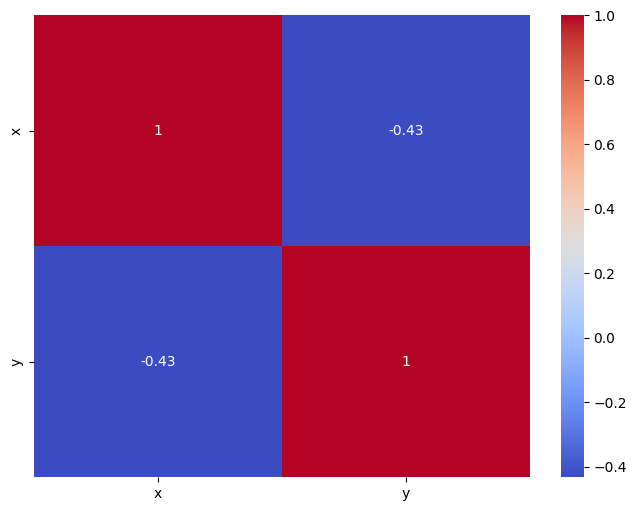

In [15]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(datos.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Aca estadarizamos los datos_var_num
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
datos_ss = ss.fit_transform(datos) # datos_ss es <class 'numpy.ndarray'>
#print(type(datos_ss))
#print(datos_ss)

In [22]:
datos_ss = pd.DataFrame(datos_ss, columns=datos.columns) # Transformamos datos_ss en dataframe pandas

no uso pca porque no hay mucha dimensionalidad que reducir sobre las variables


In [20]:
# Aca importamos las librerias de los modelos que vamos a usar
from sklearn.cluster import KMeans, DBSCAN       # AgglomerativeClustering,
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
from sklearn.neighbors import NearestNeighbors
vecinos = NearestNeighbors(n_neighbors=2)
vecinos_fit = vecinos.fit(datos)
distancias, indices = vecinos_fit.kneighbors(datos)

GRAFICO DE RODILLA


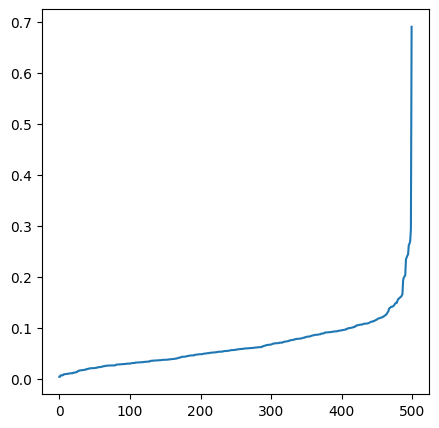

In [33]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(datos_ss)
distances, indices = neighbors_fit.kneighbors(datos_ss)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(5,5))
plt.plot(distances)

In [69]:
# CREAMOS UN SET DE DATOS PARA EL VALOR DE EPSILON (EL RADIO)
eps_values = np.arange(0.05, 0.2, 0.01) # valores de radio entre 0.05 y 0.2 incrementado a 0.01
min_samples = np.arange(1,4)# probamos con un rango de 3 a 12


In [63]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(datos_ss)
    try:
      sil_score.append(silhouette_score(datos_ss, y_dbscan))
    except:
      sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [43]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps', 'Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [44]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

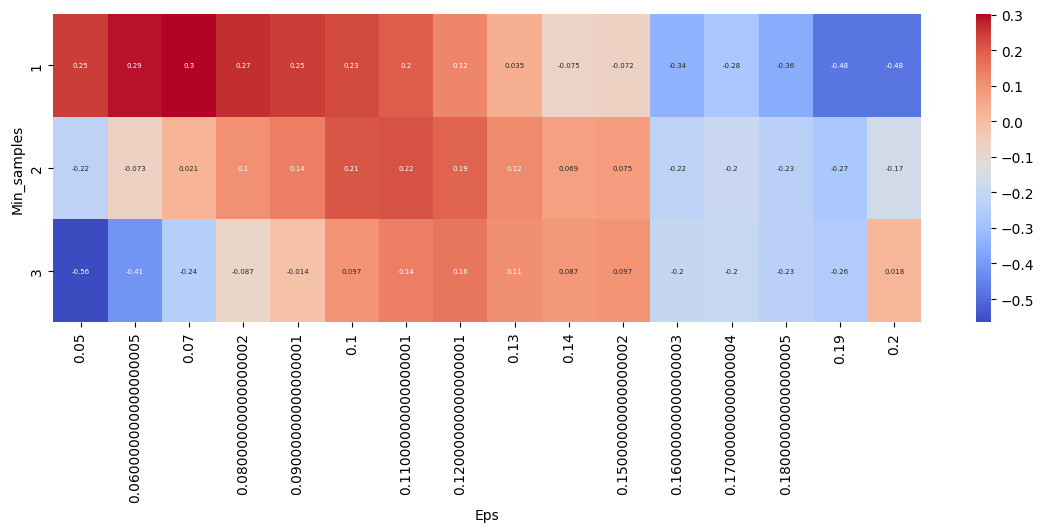

In [51]:
fig, ax = plt.subplots(figsize=(14,4))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':5}, cmap='coolwarm', ax=ax)
plt.show()

In [74]:
dbscan_train = DBSCAN(eps=0.17, min_samples=3)
y_dbscan = dbscan_train.fit_predict(datos_ss)
print(silhouette_score(datos_ss, y_dbscan))
datos['dbscan_cluster'] = y_dbscan

-0.1959557881269434
